In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_valid = scalar.transform(x_valid)
x_test = scalar.transform(x_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_ , hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_4[0][0]         

In [12]:
model.compile(loss="mean_squared_error",
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [16]:
model_history = model.fit(x_train, y_train , epochs=40, validation_data=(x_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3709 - mae: 0.4335 - val_loss: 0.3834 - val_mae: 0.4255
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3701 - mae: 0.4326 - val_loss: 0.4377 - val_mae: 0.4316
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3692 - mae: 0.4328 - val_loss: 0.4013 - val_mae: 0.4263
Epoch 4/40
363/363 [==============================] - ETA: 0s - loss: 0.3700 - mae: 0.432 - 1s 2ms/step - loss: 0.3680 - mae: 0.4315 - val_loss: 0.3788 - val_mae: 0.4270
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3676 - mae: 0.4310 - val_loss: 0.3719 - val_mae: 0.4246
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3663 - mae: 0.4304 - val_loss: 0.3966 - val_mae: 0.4245
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3659 - mae: 0.4297 - val_loss: 0.3727 - val_mae: 0.4236
Epoch 8/40
363/363 [==================

In [17]:
mae_test = model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3453 - mae: 0.4138


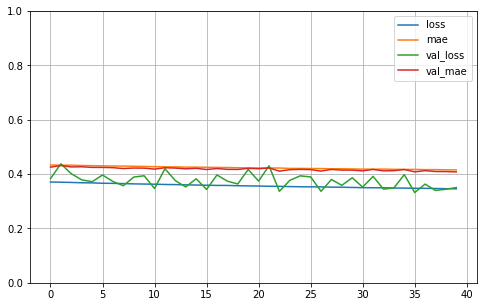

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
x_new = x_test[:3]

In [20]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.71027946]
 [1.6731737 ]
 [4.1621943 ]]
[0.477   0.458   5.00001]
